# **1. Perkenalan Dataset**



Saya mengambil dataset ini dari kaggle dengan judul Gender Classification Dataset, dalam dataset ini berisi tentang ciri ciri fisik dari seseorang dan gendernya, dataset ini akan saya gunakan untuk memprediksi gender dari data fisik dengan link https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Di tahap ini saya memuat dataset yang didownload dari kaggle dengan link https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

In [ ]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


###3.1 Informasi Dasar

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


Dataset ini memiliki 8 kolom mulai dari:
1. long_hair : rambutnya panjang atau tidak
2. forhead_width_cm : lebar dahi dalam cm
3. forehead_height_cm : tinggi dahi dalam cm
4. nose_wide : apakah hidungnya lebar atau tidak
5. nose_long : apakah hidungnya panjang atau tidak
6. lips_thin : bibirnya tipis atau tidak
7. distance_nose_to_lip_long : apakah jarak hidung ke bibir jauh atau tidak
8. gender : jenis kelamin

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

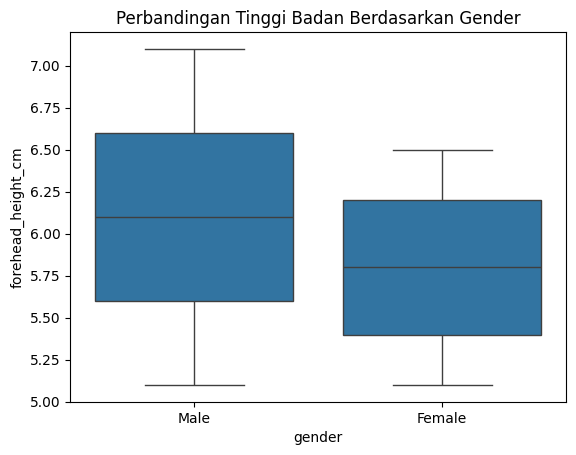

In [ ]:
sns.boxplot(x='gender', y='forehead_height_cm', data=df)
plt.title("Perbandingan Tinggi Badan Berdasarkan Gender")
plt.show()

dari boxplot ini dapat dilihat bahwa:
1. Data tinggi dahi dari laki laki lebih menyebar daripada perempuan
2. Nilai maksimum laki laki lebih tinggi daripada perempuan
3. Nilai minimumnya hampir sama

In [ ]:
df['gender'] = df['gender'].map({
    'Male': 0,
    'Female': 1
})


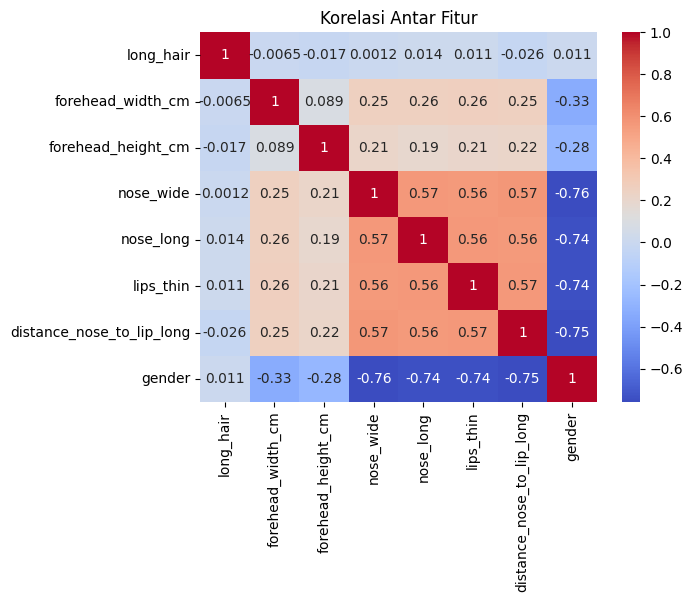

In [ ]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()



Dari heatmap ini, kesimpulan yang dapat ditarik adalah :
1. nose_wide,nose_long,lips__thin dan distance memiliki korelasi yang cukup kuat yaitu 0,56-0,57
2. forehead width dan height memiliki korelasi yang lemah dengan fitur hidung atau bibir
3. gender berpengaruh ke fitur hidung dan bibir
4. long hair memiliki korelasi yang sangat lemah ke semua fitur


# **5. Data Preprocessing**

Di tahap ini karena dataset sudah rapi saya hanya melakukan handling missing values dan menghapus data duplikat, saya tidak handling outlier karena hampir semua kolom inputnya hanya 0 dan 1 dan juga saya melakukan mapping gender dari male dan female ke 0 dan 1

###5.1 Handling Missing Values

In [ ]:
print(df.isnull().sum())

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


###5.2 Menghapus Data Duplikat

In [ ]:
df.duplicated().sum()

np.int64(1768)

In [ ]:
df[df.duplicated()].head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
59,1,14.1,5.9,0,0,0,0,1
66,1,14.2,6.2,0,0,0,0,1
175,1,12.7,5.7,1,1,1,1,0
230,1,12.9,5.1,0,0,0,0,1
261,1,13.0,6.2,1,1,1,1,0


In [ ]:
df_clean = df.drop_duplicates()

df_clean.duplicated().sum()


np.int64(0)

In [ ]:
csv = 'gender_classification_preprocessed.csv'

df.to_csv(csv, index=False)